In [2]:
import nltk
import re

import pandas as pd
from nltk.corpus import stopwords
from nltk.corpus import stopwords


import heapq
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

from wordcloud import WordCloud

nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/doanvankhoan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/doanvankhoan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
text = """
Beans. I was trying to explain to somebody as we were flying in, that's corn. That's beans. And they were very impressed at my agricultural knowledge. Please give it up for Amaury once again for that outstanding introduction. I have a bunch of good friends here today, including somebody who I served with, who is one of the finest senators in the country and we're lucky to have him, your Senator, Dick Durbin is here. I also noticed, by the way, former Governor Edgar here, who I haven't seen in a long time and somehow he has not aged and I have. And it's great to see you, Governor. I want to thank President Killeen and everybody at the U of I System for making it possible for me to be here today. And I am deeply honored at the Paul Douglas Award that is being given to me. He is somebody who set the path for so much outstanding public service here in Illinois. Now, I want to start by addressing the elephant in the room. I know people are still wondering why I didn't speak at the commencement.
"""

In [4]:
dataset = nltk.sent_tokenize(text)

In [5]:
dataset

['\nBeans.',
 "I was trying to explain to somebody as we were flying in, that's corn.",
 "That's beans.",
 'And they were very impressed at my agricultural knowledge.',
 'Please give it up for Amaury once again for that outstanding introduction.',
 "I have a bunch of good friends here today, including somebody who I served with, who is one of the finest senators in the country and we're lucky to have him, your Senator, Dick Durbin is here.",
 "I also noticed, by the way, former Governor Edgar here, who I haven't seen in a long time and somehow he has not aged and I have.",
 "And it's great to see you, Governor.",
 'I want to thank President Killeen and everybody at the U of I System for making it possible for me to be here today.',
 'And I am deeply honored at the Paul Douglas Award that is being given to me.',
 'He is somebody who set the path for so much outstanding public service here in Illinois.',
 'Now, I want to start by addressing the elephant in the room.',
 "I know people are

Step 1: Preprocessing the Text

Before applying the BoW model, we need to preprocess the text. This includes:

- Converting the text to lowercase
- Removing non-word characters
- Removing extra spaces

In [6]:
for i in range(len(dataset)):
    dataset[i] = dataset[i].lower()
    dataset[i] = re.sub(r'\W', ' ', dataset[i])
    dataset[i] = re.sub(r'\s+', ' ', dataset[i])

In [7]:
for i, sentence in enumerate(dataset):
    print(f"Sentence {i+1}: {sentence}")

Sentence 1:  beans 
Sentence 2: i was trying to explain to somebody as we were flying in that s corn 
Sentence 3: that s beans 
Sentence 4: and they were very impressed at my agricultural knowledge 
Sentence 5: please give it up for amaury once again for that outstanding introduction 
Sentence 6: i have a bunch of good friends here today including somebody who i served with who is one of the finest senators in the country and we re lucky to have him your senator dick durbin is here 
Sentence 7: i also noticed by the way former governor edgar here who i haven t seen in a long time and somehow he has not aged and i have 
Sentence 8: and it s great to see you governor 
Sentence 9: i want to thank president killeen and everybody at the u of i system for making it possible for me to be here today 
Sentence 10: and i am deeply honored at the paul douglas award that is being given to me 
Sentence 11: he is somebody who set the path for so much outstanding public service here in illinois 
Sent

Step 2: Counting Word Frequencies

In this step, we count the frequency of each word in the preprocessed text. We will store these counts in a pandas DataFrame to view them easily in a tabular format.

- We initialize a dictionary to hold our word counts.
- Then, we tokenize each sentence into words.
- For each word, we check if it exists in our dictionary. If it does, we increment its count. If it doesn’t, we add it to the dictionary with a count of 1.

In [8]:
word2count = {}

In [9]:
for data in dataset:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count:
            word2count[word] = 1
        else:
            word2count[word] += 1

In [10]:
stop_words = set(stopwords.words('english'))

stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [11]:
filtered_word2count = {
    word: count for word,count in word2count.items() if word not in stop_words
}

filtered_word2count

{'beans': 2,
 'trying': 1,
 'explain': 1,
 'somebody': 3,
 'flying': 1,
 'corn': 1,
 'impressed': 1,
 'agricultural': 1,
 'knowledge': 1,
 'please': 1,
 'give': 1,
 'amaury': 1,
 'outstanding': 2,
 'introduction': 1,
 'bunch': 1,
 'good': 1,
 'friends': 1,
 'today': 2,
 'including': 1,
 'served': 1,
 'one': 1,
 'finest': 1,
 'senators': 1,
 'country': 1,
 'lucky': 1,
 'senator': 1,
 'dick': 1,
 'durbin': 1,
 'also': 1,
 'noticed': 1,
 'way': 1,
 'former': 1,
 'governor': 2,
 'edgar': 1,
 'seen': 1,
 'long': 1,
 'time': 1,
 'somehow': 1,
 'aged': 1,
 'great': 1,
 'see': 1,
 'want': 2,
 'thank': 1,
 'president': 1,
 'killeen': 1,
 'everybody': 1,
 'u': 1,
 'system': 1,
 'making': 1,
 'possible': 1,
 'deeply': 1,
 'honored': 1,
 'paul': 1,
 'douglas': 1,
 'award': 1,
 'given': 1,
 'set': 1,
 'path': 1,
 'much': 1,
 'public': 1,
 'service': 1,
 'illinois': 1,
 'start': 1,
 'addressing': 1,
 'elephant': 1,
 'room': 1,
 'know': 1,
 'people': 1,
 'still': 1,
 'wondering': 1,
 'speak': 1,
 'co

In [12]:
word_freq_df = pd.DataFrame(
    list(filtered_word2count.items()),
    columns=["Word", "Frequency"]
)

word_freq_df

,Word,Frequency
0,beans,2
1,trying,1
2,explain,1
3,somebody,3
4,flying,1
...,...,...
67,people,1
68,still,1
69,wondering,1
70,speak,1


In [13]:
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

word_freq_df

,Word,Frequency
3,somebody,3
0,beans,2
12,outstanding,2
41,want,2
17,today,2
...,...,...
31,former,1
33,edgar,1
34,seen,1
35,long,1


Step 3: Selecting the Most Frequent Words

Now that we have counted the word frequencies, we will select the top N most frequent words (e.g top 10) to be used in the BoW model. We can visualize these frequent words using a bar chart to understand the distribution of words in our dataset.

In [14]:
freq_words = heapq.nlargest(10, word2count, key=word2count.get)

freq_words

['i', 'the', 'to', 'and', 'in', 'for', 'here', 'that', 'at', 'who']

In [15]:
top_words = sorted(
    word2count.items(),
    key=lambda x: x[1],
    reverse=True
)[:10]

top_words

[('i', 12),
 ('the', 9),
 ('to', 8),
 ('and', 7),
 ('in', 5),
 ('for', 5),
 ('here', 5),
 ('that', 4),
 ('at', 4),
 ('who', 4)]

In [16]:
words, counts = zip(*top_words)

words

('i', 'the', 'to', 'and', 'in', 'for', 'here', 'that', 'at', 'who')

In [17]:
counts

(12, 9, 8, 7, 5, 5, 5, 4, 4, 4)

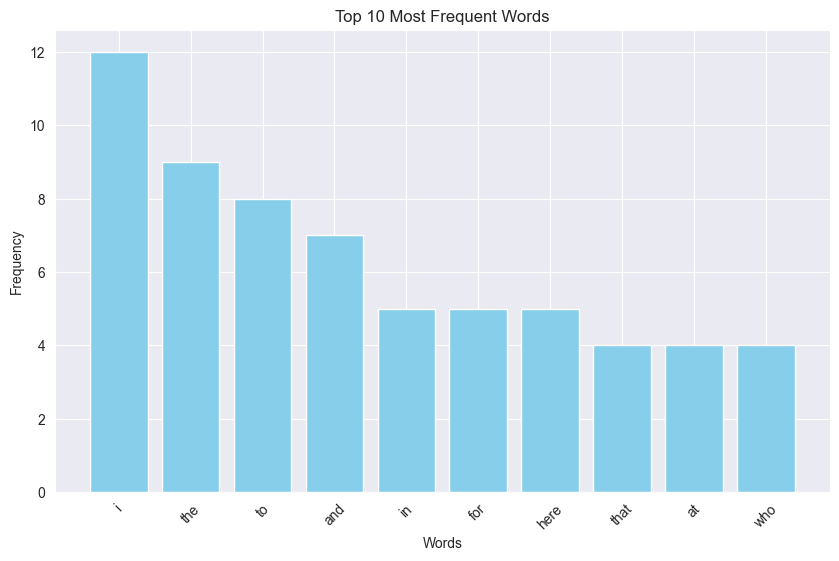

In [18]:
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45)
plt.title("Top 10 Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

Step 4: Building the Bag of Words (BoW) Model

Now we will build the Bag of Words (BoW) model. This model is represented as a binary matrix where each row corresponds to a sentence and each column represents one of the top N frequent words. A 1 in the matrix shows that the word is present in the sentence and a 0 shows its absence.

We will use a heatmap to visualize this binary matrix where green shows the presence of a word (1) and red shows its absence (0).

In [19]:
X = []

In [20]:
for data in dataset:
    vector = []
    for word in freq_words:
        if word in nltk.word_tokenize(data):
            vector.append(1)
        else:
            vector.append(0)

    X.append(vector)

In [21]:
X = np.asarray(X)

In [22]:
X

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
       [1, 1, 1, 1, 1, 0, 1, 0, 0, 1],
       [1, 1, 0, 1, 1, 0, 1, 0, 0, 1],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 1, 1, 0, 1, 0],
       [1, 1, 1, 1, 0, 0, 0, 1, 1, 0],
       [0, 1, 0, 0, 1, 1, 1, 0, 0, 1],
       [1, 1, 1, 0, 1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 1, 0]])

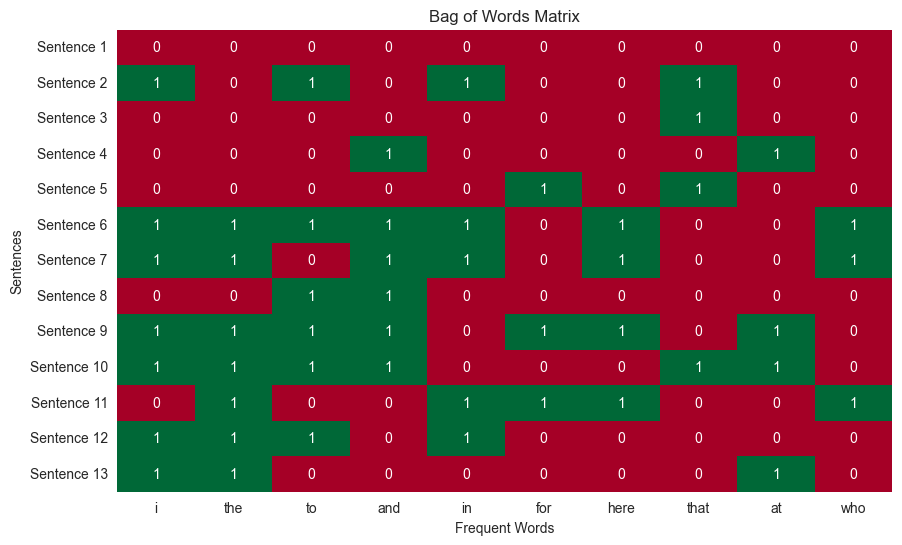

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    X,
    cmap="RdYlGn",
    cbar=False,
    annot=True,
    fmt="d",
    xticklabels=freq_words,
    yticklabels=[f"Sentence {i+1}" for i in range(len(dataset))]
)
plt.title("Bag of Words Matrix")
plt.xlabel("Frequent Words")
plt.ylabel("Sentences")
plt.show()

Step 5: Visualizing Word Frequencies with a Word Cloud

Finally, we can create a Word Cloud to visually represent the word frequencies. In a word cloud, the size of each word is proportional to its frequency which makes it easy to identify the most common words at a glance.

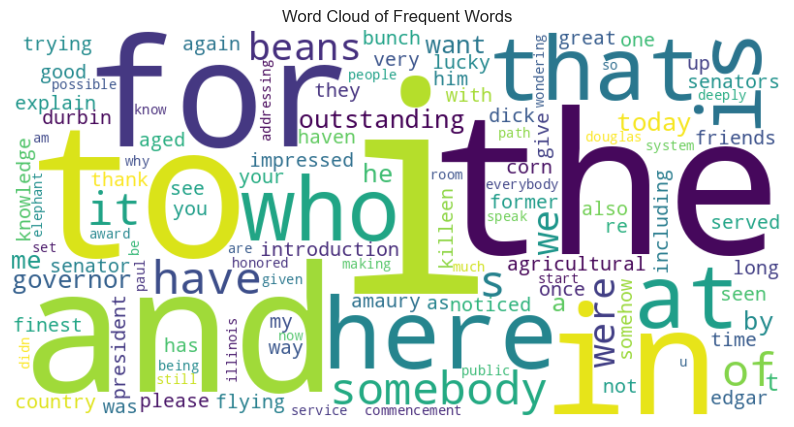

In [25]:
wordcloud = WordCloud(width=800, height=400, background_color="white")

wordcloud.generate_from_frequencies(word2count)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Frequent Words")
plt.show()